In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
peptides = pd.read_csv('../data/NetMHCpan/peptides.csv')
# remove all with count <10 or >140
peptides = peptides[(peptides['count'] >= 5) & (peptides['count'] <= 140)]
potential_pos = peptides['pos'].unique()
potential_pos
pos_to_index = {}
for pos in potential_pos:
    pos_to_index[pos] = peptides[peptides['pos'] == pos].index
pos_to_index
indices = []
for pos in potential_pos:
    indices.extend(peptides[peptides['pos'] == pos].index)
indices
peptides

,peptide,pos,count,freq
1042,NQVAVLYQG,605,131,0.873333
1043,NQVAVLYQD,605,18,0.120000
1045,QVAVLYQGV,606,131,0.873333
1046,QVAVLYQDV,606,18,0.120000
1048,VAVLYQGVN,607,131,0.873333
1049,VAVLYQDVN,607,18,0.120000
1051,AVLYQGVNC,608,131,0.873333
1052,AVLYQDVNC,608,18,0.120000
1054,VLYQGVNCT,609,131,0.873333
1055,VLYQDVNCT,609,18,0.120000


In [42]:
rank_EL_matrix = pd.read_csv('../data/NetMHCpan/rank_EL_matrix.csv', header=None)
rank_EL_matrix = rank_EL_matrix.loc[indices]
rank_EL_matrix

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
1042,75.455,37.300,26.656,35.562,13.888,15.092,45.250,42.789,71.667,62.500,...,65.000,44.000,50.000,61.667,61.667,46.000,52.500,65.000,61.250,59.286
1043,85.000,54.333,44.929,58.462,28.988,29.905,56.667,55.333,85.000,85.000,...,85.000,67.500,70.000,80.000,80.000,90.000,85.000,80.000,80.000,80.000
1045,19.173,3.713,2.807,2.247,0.864,1.410,2.556,3.352,21.821,22.167,...,19.000,15.046,12.309,29.714,29.714,4.986,6.412,20.848,9.045,22.024
1046,22.772,10.446,7.469,6.797,3.374,5.271,6.510,8.586,40.600,39.000,...,22.750,22.079,17.811,36.500,36.500,9.679,10.716,22.056,11.679,28.054
1048,69.333,95.000,87.500,87.500,87.000,82.500,87.500,93.333,90.000,90.000,...,75.000,48.500,33.000,72.500,72.500,61.667,60.000,38.250,66.667,95.000
1049,69.333,87.500,87.500,95.000,86.000,80.000,87.500,91.667,90.000,90.000,...,62.500,55.000,44.500,80.000,80.000,63.333,62.500,42.667,75.000,95.000
1051,48.875,12.303,20.428,15.715,13.344,6.823,12.239,11.152,17.420,11.211,...,20.786,27.889,30.286,43.000,43.000,13.628,17.292,29.818,17.168,37.429
1052,53.710,13.480,20.231,25.722,14.532,7.423,15.139,14.074,32.889,16.613,...,21.833,41.250,43.500,60.000,60.000,20.722,22.920,43.500,18.477,42.111
1054,26.135,1.358,1.683,0.963,3.466,2.369,4.927,1.288,15.192,28.714,...,22.200,19.859,14.670,20.981,20.981,14.978,16.769,18.485,11.647,20.118
1055,31.542,1.738,2.251,1.699,4.596,2.833,6.355,2.020,25.905,45.000,...,25.692,25.625,19.378,27.579,27.579,24.297,24.667,21.975,13.329,26.771


In [49]:
frequencies = pd.read_csv('../data/NetMHCpan/alleles.csv')

,allele,AFA_freq,API_freq,NAM_freq,HIS_freq,CAU_freq,max_freq
0,A*01:01,0.046828,0.071374,0.118401,0.072930,0.158827,0.158827
1,A*02:01,0.122231,0.084351,0.265083,0.209555,0.271597,0.271597
2,A*02:02,0.041633,0.000191,0.002031,0.007583,0.001121,0.041633
3,A*02:03,0.000205,0.034416,0.000683,0.000130,0.000063,0.034416
4,A*02:05,0.015377,0.004601,0.007509,0.015668,0.010050,0.015668
...,...,...,...,...,...,...,...
97,C*15:02,0.005577,0.062260,0.043175,0.035699,0.022854,0.062260
98,C*15:05,0.013497,0.013403,0.002582,0.005982,0.004144,0.013497
99,C*16:01,0.096505,0.000886,0.028689,0.054938,0.028849,0.096505
100,C*17:01,0.068061,0.002157,0.009065,0.018696,0.010441,0.068061


Target is mutation 1061 -> 1060 (pos 614)

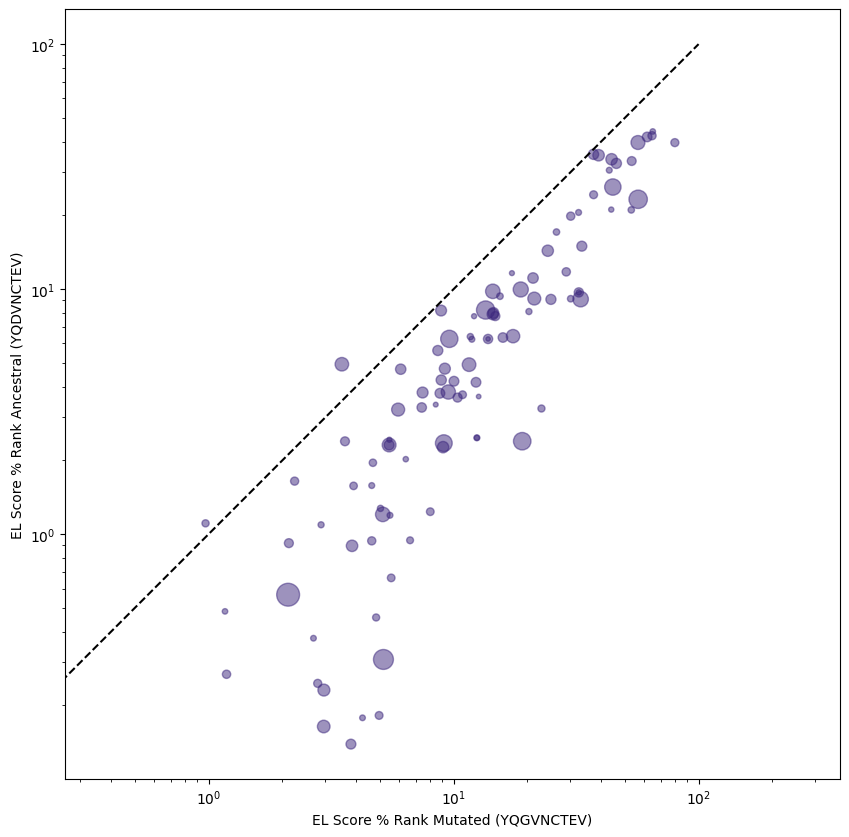

In [73]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(rank_EL_matrix.loc[1060], rank_EL_matrix.loc[1061], s=frequencies['max_freq']*1000, color='#3c277d', alpha=0.5)
plt.plot([0, 100], [0, 100], color='k', linestyle='--')
plt.xlabel('EL Score % Rank Mutated (YQGVNCTEV)')
plt.ylabel('EL Score % Rank Ancestral (YQDVNCTEV)')
plt.axis('equal')
plt.yscale('log')
plt.xscale('log')
plt.show()

P681H

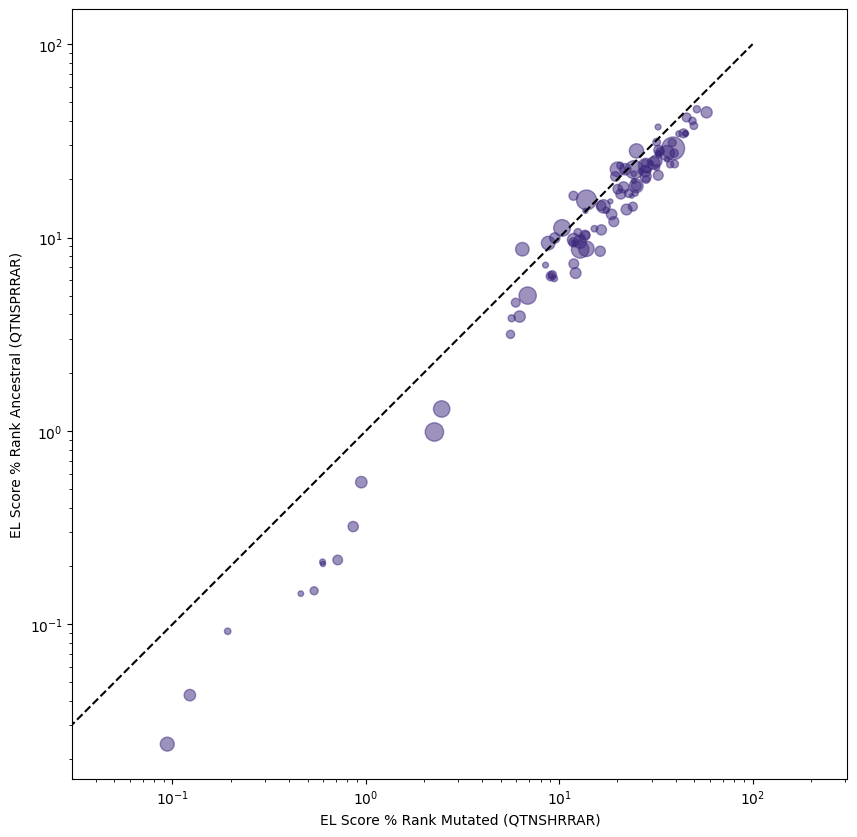

In [72]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(rank_EL_matrix.loc[1200], rank_EL_matrix.loc[1199], s=frequencies['max_freq']*1000, color='#3c277d', alpha=0.5)
plt.plot([0, 100], [0, 100], color='k', linestyle='--')
plt.xlabel('EL Score % Rank Mutated (QTNSHRRAR)')
plt.ylabel('EL Score % Rank Ancestral (QTNSPRRAR)')
plt.axis('equal')
plt.yscale('log')
plt.xscale('log')
plt.show()